# Tarea 3

In [52]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

## Pregunta 1 

### 1.a)

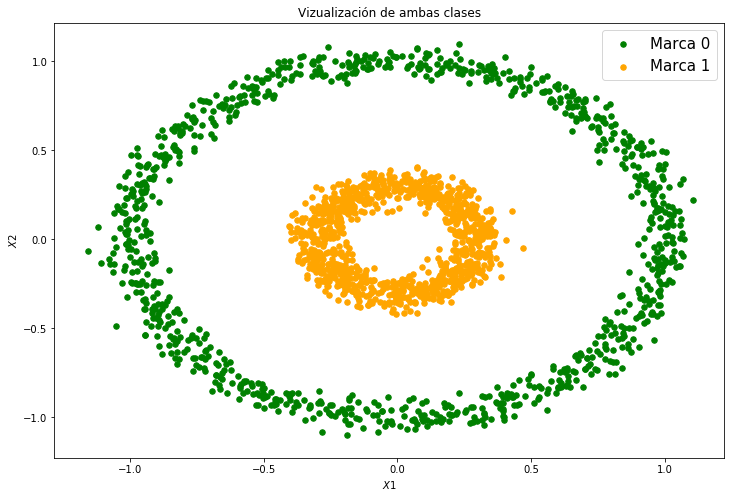

In [17]:
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x), np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp), np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test

def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],levels=[-2, 0, 2])
    plt.show()
    
#=======grafico de los datos==============
X_train,Y_train,X_test,Y_test=do_circles()
plt.figure(figsize = (12, 8))
plt.scatter([X_train[i,0] for i in range(len(Y_train)) if Y_train[i] == 0],[X_train[i,1] for i in range(len(Y_train)) if Y_train[i] == 0], s=30, c = "green")
plt.scatter([X_train[i,0] for i in range(len(Y_train)) if Y_train[i] == 1],[X_train[i,1] for i in range(len(Y_train)) if Y_train[i] == 1], s=30, c = "orange")
plt.scatter([X_test[i,0] for i in range(len(Y_test)) if Y_test[i] == 0],[X_test[i,1] for i in range(len(Y_test)) if Y_test[i] == 0], s=30, c = "green")
plt.scatter([X_test[i,0] for i in range(len(Y_test)) if Y_test[i] == 1],[X_test[i,1] for i in range(len(Y_test)) if Y_test[i] == 1], s=30, c = "orange")
plt.xlabel("$X1$")
plt.ylabel("$X2$")
plt.legend(['Marca 0','Marca 1'],prop={'size': 15})
plt.title("Vizualización de ambas clases")
plt.show()



### 1.b)

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
n_h=1
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(n_h, init='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  import sys


Epoch 1/50
1000/1000 [==============================] - 0s 251us/step - loss: 0.6933 - acc: 0.5150
Epoch 2/50
1000/1000 [==============================] - 0s 13us/step - loss: 0.6954 - acc: 0.4710
Epoch 3/50
1000/1000 [==============================] - 0s 13us/step - loss: 0.6938 - acc: 0.4950
Epoch 4/50
1000/1000 [==============================] - 0s 13us/step - loss: 0.6908 - acc: 0.5230
Epoch 5/50
1000/1000 [==============================] - 0s 13us/step - loss: 0.6886 - acc: 0.5500
Epoch 6/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6804 - acc: 0.5800
Epoch 7/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6664 - acc: 0.6500
Epoch 8/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6473 - acc: 0.6120
Epoch 9/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6296 - acc: 0.6290
Epoch 10/50
1000/1000 [==============================] - 0s 12us/step - loss: 0.6122 - acc: 0.6360
Epoch 11/50
1000/1

### 1.c)

In [27]:
n_h=32
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

Epoch 1/50
1000/1000 [==============================] - 0s 292us/step - loss: 0.6927 - acc: 0.5200
Epoch 2/50
1000/1000 [==============================] - 0s 15us/step - loss: 0.6891 - acc: 0.6030
Epoch 3/50
1000/1000 [==============================] - 0s 13us/step - loss: 0.6794 - acc: 0.6640
Epoch 4/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6569 - acc: 0.8290
Epoch 5/50
1000/1000 [==============================] - 0s 13us/step - loss: 0.6000 - acc: 0.8730
Epoch 6/50
1000/1000 [==============================] - 0s 12us/step - loss: 0.5043 - acc: 0.9670
Epoch 7/50
1000/1000 [==============================] - 0s 12us/step - loss: 0.3880 - acc: 0.9990
Epoch 8/50
1000/1000 [==============================] - 0s 12us/step - loss: 0.2773 - acc: 1.0000
Epoch 9/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.1957 - acc: 1.0000
Epoch 10/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.1423 - acc: 1.0000
Epoch 11/50
1000/1

### 1.d)

Test Accuracy = 0.670000
1


C:\Users\Gabriel\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


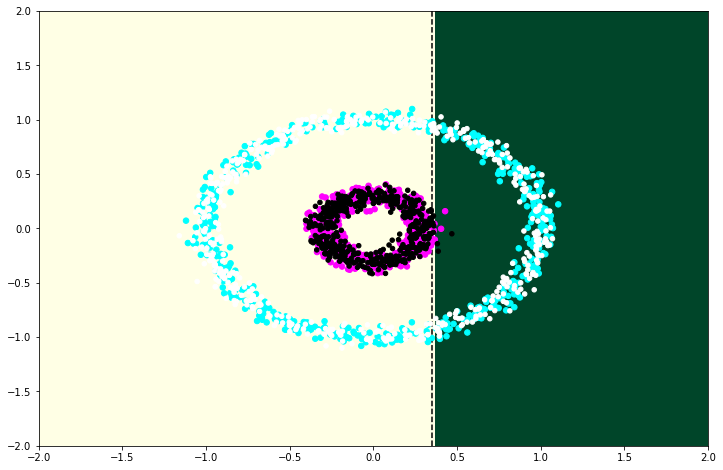

In [29]:
from sklearn.tree import DecisionTreeClassifier as Tree
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print (clf.tree_.max_depth)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

### 1.e)

Test Accuracy = 0.992000
5


C:\Users\Gabriel\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


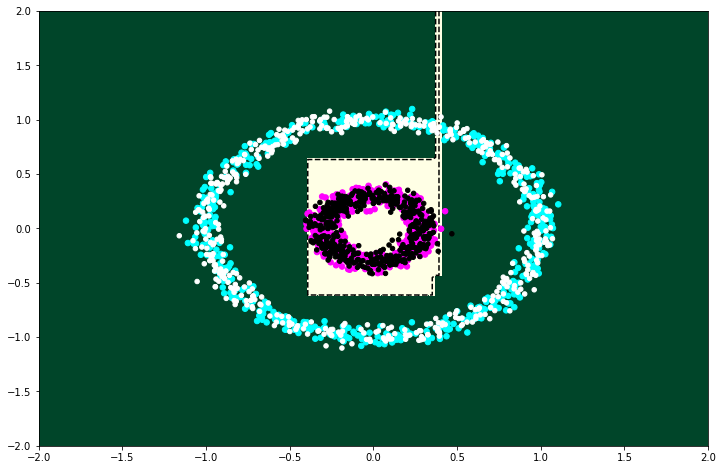

In [31]:
n_t=8
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print (clf.tree_.max_depth)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

### 1.f)

In [34]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

### 1.g)

In [ ]:
##mira men deja te xpliko, aqui se podria usar el ese ve eme o la regresion longistica

## Pregunta 2

### 2.a)

In [36]:
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])
print ('\nSummary - dataframe completo:\n')
print (df.describe())
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])


Summary - dataframe completo:

         Unnamed: 0        season       holiday    workingday       weather  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean    5442.500000      2.506614      0.028569      0.680875      1.418427   
std     3142.661849      1.116174      0.166599      0.466159      0.633839   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%     2721.250000      2.000000      0.000000      0.000000      1.000000   
50%     5442.500000      3.000000      0.000000      1.000000      1.000000   
75%     8163.750000      4.000000      0.000000      1.000000      2.000000   
max    10885.000000      4.000000      1.000000      1.000000      4.000000   

              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159    

### 2.b)

SCORE TEST=0.703388
KAGG EVAL TRAIN =0.028516
KAGG EVAL TEST =0.574239


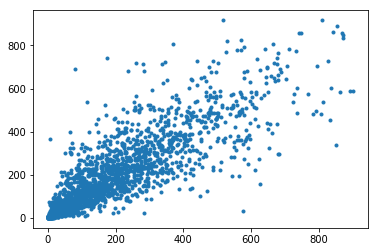

In [41]:
from sklearn.tree import DecisionTreeRegressor as Tree
def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

Xdf=df.loc[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour']]
Ydf=df.loc[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print ("SCORE TEST=%f"%score_test)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print ("KAGG EVAL TRAIN =%f"%kagg_train)
print ("KAGG EVAL TEST =%f"%kagg_test)
plt.plot(Y_test,Y_pred_test,'.')
plt.show()

### 2.c)

In [42]:
model = Tree(random_state=0,max_depth=20)
model.fit(X_train,Y_train)
Y_pred_val = model.predict(X_val)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print ("KAGG EVAL VAL =%f"%kagg_val)

KAGG EVAL VAL =0.546219


### 2.d)

In [44]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek #0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday']]

### 2.e)

In [50]:
#load dataframes as before ...
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.loc[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday']]

#PASO IMPORTANTE MAS ABAJO ...

Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday'])
Ydf=df.loc[:,'count']

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

from sklearn.svm import SVR
model = SVR()
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

### 2.f)

In [51]:
model = SVR(C=1,epsilon=0.01)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print ("KAGG EVAL TRAIN =%f"%kagg_train)
print ("KAGG EVAL VAL =%f"%kagg_val)

KAGG EVAL TRAIN =nan
KAGG EVAL VAL =nan


C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


### 2.g)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    model = #define your model
    model.fit(Xm[train], ym[train])
    yhat_val = model.predict(Xm[val])
    ytrue_val = ym[val]
    score_fold = eval_bikemodel(yhat_val,ytrue_val)
    mse_cv += score_fold
mse_cv = mse_cv / 10

### 2.h)

In [ ]:
Ydf=df.loc[:,'count'] #demanda total
2 Ydf=df.loc[:,'registered'] #demanda registrada
3 Ydf=df.loc[:,'casual'] #demanda casual

### 2.i)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,max_depth=max_depth,random_state=0)

## Pregunta 3

### 3.a)

In [53]:
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")
df = pd.concat([df_red,df_white], axis=0)
#genere atributo tipo

### 3.b)

In [ ]:
df['good_quality'] = [1 if q>5 else 0 for q in df.quality] #then remove quality from df 
#train and test split over df

### 3.c)

In [ ]:
#ohno

### 3.d)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=, max_depth=,n_jobs=-1)
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

### 3.e)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator=Tree(max_depth=), n_estimators=)

### 3.f)

In [ ]:
#AAAAAAAAAH

### 3.g)

## Pregunta 4

### 4.a)

In [54]:
from sklearn.model_selection import train_test_split
def load_data():
    train = pd.read_csv('sign_mnist_train.csv')
    test = pd.read_csv('sign_mnist_test.csv')
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    y_t = test['label']
    x_t = test.iloc[:,1:]
    #you need to add Xval: x_v,y_v
    return(x_tr,x_v,x_t,y_tr,y_v,y_t)
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

NameError: name 'x_v' is not defined

### 4.b)

### 4.c)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr.values, to_categorical(y_tr), nb_epoch=100, batch_size=128, verbose=1,validation_data=(x_v.values,to_categorical(y_v)))

### 4.d)

### 4.e)

### 4.f)